<a href="https://colab.research.google.com/github/bbishal12/Quiz0/blob/main/Exam1_Bishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam 1
##Bishal Budhathoki
##Course CPSMA 4313

##Resources for all works:

Quiz help

Lectures

Notes

Professor's Github Repo

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

https://datatofish.com/drop-index-pandas-dataframe/

https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

1.Gather the table on 8000 km mountains from the wikipedia page https://en.wikipedia.org/wiki/List of mountains by elevation:

a. Store the data as a pandas dataframe.

The datas and library are loaded as a panada dataframe

In [23]:
import requests
import pandas as pa
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pa.read_html(str(tables))[0]
df





,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


These above dataset are the table on 8000Km moutains from wikipedia page of moutains.

b) (10 points) Return only mountains in the ‘Himalayas’:


In [24]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


The above data is the return only mountains in the himalayas by using query df.

(c) (10 points) Create a barchart of the Ranges


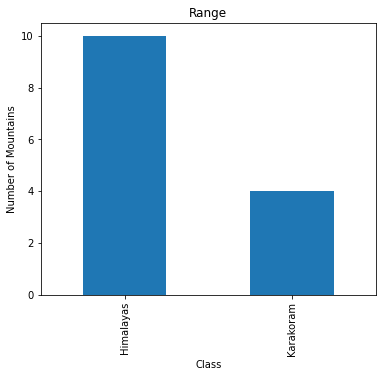

In [25]:
dfg = df.groupby(['Range'])['Range'].count()

dfg.plot(kind='bar', title='Range', ylabel='Number of Mountains',
         xlabel='Class', figsize=(6, 5))

The above figure is barchart for the ranges using df.

d) (10 points) Create a box-plot of the height in Feet


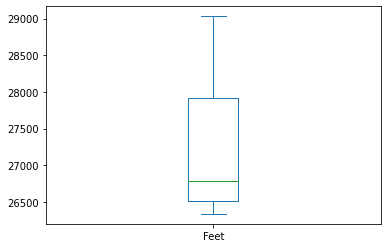

In [26]:
df.Feet.plot(kind = 'box')

The above figure is box-plot of the height in feet.

(e) (10 points) Report the mean, standard deviation and five number summary of the height in Feet

In [27]:
df.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

The above table is the report for mean, std, and five number summary of the height in feet using df.

(f) (10 points) Report the mean and median of mountains when grouped by their Range.

In [28]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()

print(tabulate(mean, headers=["Range", "Meters_mean", "Feet_mean"], tablefmt="psql"))

print(tabulate(median, headers=["Range", "Meters_median", "Feet_median"], tablefmt="psql"))

+-----------+---------------+-------------+
| Range     |   Meters_mean |   Feet_mean |
|-----------+---------------+-------------|
| Himalayas |       8319.8  |     27295.9 |
| Karakoram |       8194.25 |     26884   |
+-----------+---------------+-------------+
+-----------+-----------------+---------------+
| Range     |   Meters_median |   Feet_median |
|-----------+-----------------+---------------|
| Himalayas |          8177.5 |       26829.5 |
| Karakoram |          8065.5 |       26461.5 |
+-----------+-----------------+---------------+


Here, the above dataset table are the report mean and median of moutains whem grouped by their Range.

2.Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.

(a) (10 points) How many rows are in the dataset?



In [29]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [30]:
%%bigquery --project data-viz-bishal
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


The above answer is the rows in the dataset.

b) (10 points) What is the average trip total based on payment type?

In [32]:
%%bigquery --project data-viz-bishal
SELECT payment_type as payment_type, AVG(trip_total) as avg_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,avg_trips
0,Dispute,15.496588
1,Pcard,10.116931
2,Unknown,17.649893
3,Mobile,20.339910
4,No Charge,15.836177
5,Prepaid,22.377662
6,Cash,12.265548
7,Way2ride,16.639366
8,Split,18.788039
9,Credit Card,20.524892


The above dataset is the average trip total based on payment type. We used the SELECT query and use Avg and Group By payment_type.

(c) (10 points) How many trips, that had a non-zero recorded time, were above the average time?


In [33]:
%%bigquery --project data-viz-bishal
SELECT COUNT(*) as nonZero_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds != 0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_time FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,nonZero_trips_above_avg_time
0,62143014


The given answer is the trips that had a non-zero recorded time above the average time. We use SELECT COUNT and use WHERE as well as Avg to get average time.

3. (10 points) Questions about the exam

a) Approximately how long did you work on this exam?

On this exam, I spent approximatley around 5 hours to finish all the question which includes save later.


b) Which was the hardest and easiest topic from this section?

The hardest topic from this section is question number 1 about HTML where we work on wikipedia and we have to only return mountains in the 'Himalayas' so 1 (a). 

The easiest topic from this section is about BigQuery public dataset using SQL where finding rows in the dataset.

(c) Which method of gathering data are you most excited to use again?

The most excited method is HTML and HTML table data where we can link the wikipedia of anything by loading libraries and stored data as a pandas dataframe. I would defintely use this topic in the future work as well.



#References:

I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.

Bishal Budhathoki